<a href="https://colab.research.google.com/github/eridanirojas/563-rojas/blob/main/ER_HW4_lattice_mc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#HW4
import numpy
directions = [numpy.array((1,0)),numpy.array((0,-1)),numpy.array((-1,0)),numpy.array((0,1))]
def pbc(site,L): #The convention here is to have positive lattice indices
  for i,s in enumerate(site):
    if s >= L:
      site[i] = s - L
    elif s < 0:
      site[i] = s + L
  return site

class grid():
  def __init__(self,N=5,L=4,T=1.0):
    self.L = L
    self.N = N
    self.epsilon = -1
    self.kT = T
    self.particles = []
    for i in range(self.N):
      self.particles.append(particle())
      while True:
        rands = self.random_site()
        if not self.occupied(rands):
          self.particles[-1].location = rands
          break
    self.E = self.energy()

  def occupied(self,site):
    for p in self.particles:
      if numpy.array_equal(p.location,site):
        return True
    return False

  def random_site(self):
    return numpy.array((numpy.random.randint(self.L),numpy.random.randint(self.L)))

  def distance(self,site1,site2):
    return numpy.linalg.norm(site1-site2)

  def energy(self):
    energy = 0
    for p in self.particles:
      neighbors = p.get_neighbors(self.L)
      for n in neighbors:
        if self.occupied(n):
          energy += self.epsilon
    return energy/2

  def __repr__(self):
    m = numpy.zeros((self.L, self.L))
    for p in self.particles:
      m[tuple(p.location)] = 1
    return str(m)

class particle():
  def __init__(self):
    self.location = numpy.array((-1,-1)) #negative index means unplaced

  def get_neighbors(self,L):
    neighbors = []
    for d in directions:
      neighbors.append( pbc(d+self.location, L))
    return neighbors

class simulation():
  def __init__(self,N=5,L=3,T=1.,steps = 1000,seed=2):
    numpy.random.seed(seed)
    self.grid = grid(N,L,T)
    self.accepted = 0
    self.rejected = 0
    self.energies = numpy.zeros(steps)
    for i in range(steps):
      self.trial_move()
      self.energies[i] = self.grid.E/N
      #if i%1000 == 0:
      #  print(i)
      #  print(self.grid.E)
      #  print(self.grid)

  def trial_move(self):
    p = numpy.random.choice(self.grid.particles)
    old = p.location
    oldE = self.grid.E
    trial = self.grid.random_site()
    if not self.grid.occupied(trial):
      p.location = trial
      E = self.grid.energy()
      dE = E - oldE
      if numpy.random.rand() < numpy.exp(-dE/self.grid.kT):
        self.grid.E = E
        self.accepted += 1
        return
    p.location = old #need to reject moves that are overlaps
    self.grid.E = oldE
    self.rejected += 1


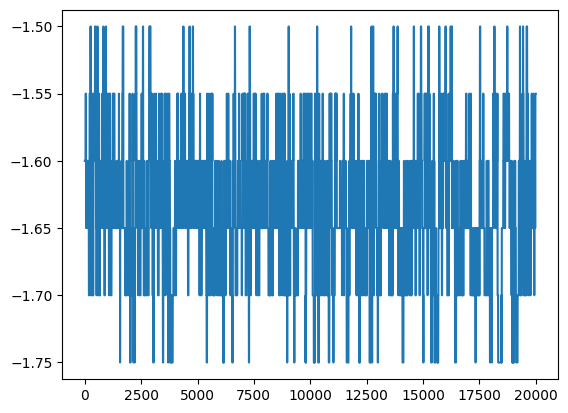

In [26]:
import matplotlib.pyplot as plt
q1 = simulation(N=20,L=5,T=1,steps=20000, seed = 2)
plt.plot(q1.energies)

In [27]:
# Question 1: What is the average energy-per-particle for a system with parameters T = 1 and N/V = 0.8? V = L*L
numpy.average(q1.energies)/80

-0.02047578125

In [12]:
# Q2: Which N do I lose confidence in my answer?
# This cell runs sims at different values of V and N.
import time
e = []
L_list = [5,10,15,20,25]
for N in L_list:
  print(N)
  n = int((N**2)*0.8)
  t1 = time.perf_counter()
  s = simulation(N=n,L=N,T=1,steps=1000, seed = numpy.random.randint(100000))
  e.append(numpy.average(s.energies)/n)
  t2 = time.perf_counter()

  print("\nN=",N,"seconds/100steps =", t2-t1)
  #if t2-t1 > 30:
    #print("Taking a minute for 200 steps. TOO SLOW")
    #break


5

N= 5 seconds/100steps = 0.8426531850000174
10

N= 10 seconds/100steps = 9.927536836999991
15

N= 15 seconds/100steps = 48.98820311200001
20

N= 20 seconds/100steps = 167.41711568800002
25

N= 25 seconds/100steps = 422.29026754200004


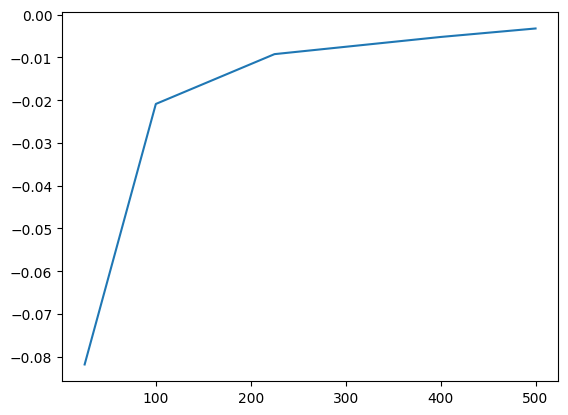

In [13]:
# Answer: I lose confidence when N > 80, as there is a higher standard deviation as N is lower, explained in next cells.
N_list = [25,100,225,400,500]
plt.plot(N_list,e)

In [3]:
j = 3
i = 0
e_std = []
new_list = [5,10,15]
for k in new_list:
  i = 0
  while i != j:
    print(k)
    n = int((k**2)*0.8)
    s = simulation(N=n,L=k,T=1,steps=1000, seed = numpy.random.randint(100000))
    e_std.append(numpy.average(s.energies)/n)
    i += 1

5
5
5
10
10
10
15
15
15


In [23]:
# Q2: How precise are my measurements?
print("STD for N = 20, V = 25: ", numpy.std(e_std[0:3])) # for N = 20, V = 25
print("STD for N = 80, V = 100: ", numpy.std(e_std[3:6])) # for N = 80, V = 100
print("STD for N = 180, V = 225: ", numpy.std(e_std[6:9])) # for N = 180, V = 225
print("Standard deviation becomes smaller as N increases, meaning higher N means more precision")

STD for N = 20, V = 25:  0.0003394746758678103
STD for N = 80, V = 100:  0.00041641267649304047
STD for N = 180, V = 225:  5.4540017020721905e-05
Standard deviation becomes smaller as N increases, meaning higher N means more precision


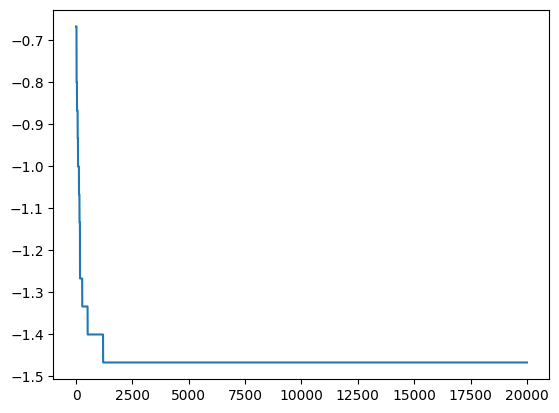

In [34]:
q3and5 = simulation(N=15,L=7,T=0.05,steps=20000, seed = 2)
plt.plot(q3and5.energies)

In [35]:
print("Average energy per particle for a system with T=0.05: ", numpy.average(q3and5.energies)/15) # Question 3

Average energy per particle for a system with T=0.05:  -0.0971431111111111


In [ ]:
# Question 4: What is the optimal system size for finding average energies?
# According to question 2's simulation times shown in the output, anything past V = 225 and N = 180 will result in too long of simulation times
# Plus the slope of the average energy per particle graph seems to converge as the system size increases.

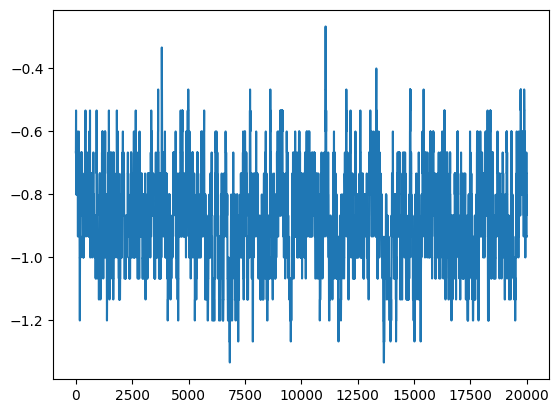

In [37]:
# Question 5: What is the trial acceptance rate of T = 1 and T = 0.05?
q5 = simulation(N=15,L=7,T=1,steps=20000, seed = 2)
plt.plot(q5.energies)

In [40]:
print("Acceptance rate for T = 0.05: ", (q3and5.accepted/(q3and5.accepted+q3and5.rejected))*100, "%") # T = 0.05
print("Acceptance rate for T = 1.00: ", (q5.accepted/(q5.accepted+q5.rejected))*100, "%") # T = 1.0

Acceptance rate for T = 0.05:  2.205 %
Acceptance rate for T = 1.00:  36.735 %
